In [30]:
from inebs.ineb import INeb

from pymatgen.core import Structure

import crystal_toolkit

In [31]:
struct = Structure.from_file('POSCAR')*[3,3,3]
struct

#### 1. Initialise INeb and relax using CHGNet (optional)

In [32]:
ineb = INeb()
energy,structure = ineb.chgnet_relax(structure=struct,**{'steps':1,'fmax':0.1,'relax_model':'MDMin'})
energy

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on mps
       Step     Time          Energy          fmax
MDMin:    0 14:55:22     -615.997753        0.000001


-615.9977531433105

### 2. generate interstitial mappings using Doped (https://github.com/SMTG-Bham/doped)

In [33]:
mappings = ineb.get_interstitial_neb_mappings(structure,relax_with_chgnet=False)

Generating substitutions: 20.0%|██        | [00:00,  224.76it/s]

running doped...


Generating DefectEntry objects: 100.0%|██████████| [00:03,  27.48it/s]



2 interstitial(s) found from doped:
 - ['Li_i_C3v_0', 'Li_i_D4h_0']
            

10 pathways found:
           site1       site2 direction
0     Li_i_C3v_0  Li_i_C3v_0         c
2     Li_i_C3v_0  Li_i_C3v_0         b
4     Li_i_C3v_0  Li_i_C3v_0         a
6     Li_i_C3v_0  Li_i_C3v_0        bc
10    Li_i_C3v_0  Li_i_C3v_0        ac
14    Li_i_C3v_0  Li_i_C3v_0        ab
18    Li_i_C3v_0  Li_i_D4h_0       abc
2592  Li_i_D4h_0  Li_i_D4h_0        bc
2596  Li_i_D4h_0  Li_i_D4h_0        ac
2808  Li_i_D4h_0  Li_i_D4h_0        ab
              


### 3. generate interstitialcy mappings based on the interstitial pathways found

In [34]:
mappings_intcy = ineb.get_interstitialcy_neb_mappings(structure,passthrough_search_radius=3)

There are 14 total interstitialcy paths:
0: 2interstitialcy paths 
 - - - passthrough indexes = [0, 27] 
2: 2interstitialcy paths 
 - - - passthrough indexes = [0, 54] 
4: 2interstitialcy paths 
 - - - passthrough indexes = [27, 54] 
6: 1interstitialcy paths 
 - - - passthrough indexes = [0] 
10: 1interstitialcy paths 
 - - - passthrough indexes = [27] 
14: 1interstitialcy paths 
 - - - passthrough indexes = [54] 
18: 2interstitialcy paths 
 - - - passthrough indexes = [27, 0] 
2592: 1interstitialcy paths 
 - - - passthrough indexes = [0] 
2596: 1interstitialcy paths 
 - - - passthrough indexes = [27] 
2808: 1interstitialcy paths 
 - - - passthrough indexes = [54] 


In [35]:
'''
save the interstitial images as POSCAR files to run with VASP 
'''
# ineb.save_interstitial_VASP(location='interstitial',nimages=5)

'\nsave the interstitial images as POSCAR files to run with VASP \n'

In [36]:
'''
save the interstitialcy images as POSCAR files to run with VASP 
'''
# ineb.save_interstitialcy_VASP(location='interstitialcy',nimages=5)

'\nsave the interstitialcy images as POSCAR files to run with VASP \n'

### 4. you can also run a simple NEB using CHGNet (https://chgnet.lbl.gov) as the calculator through ASE (https://wiki.fysik.dtu.dk/ase/). 

In [37]:
'''relax the end points first '''
_,ii = ineb.chgnet_relax(mappings[2592]['init_structure'],fmax=0.5)
_,ff = ineb.chgnet_relax(mappings[2592]['final_structure'],fmax=0.5)

       Step     Time          Energy          fmax
MDMin:    0 14:55:29     -615.276604        2.307222
MDMin:    1 14:55:30     -615.722706        1.839513
MDMin:    2 14:55:30     -616.709072        1.275102
MDMin:    3 14:55:30     -617.499397        0.607010
MDMin:    4 14:55:30     -617.797253        0.129594
       Step     Time          Energy          fmax
MDMin:    0 14:55:31     -615.276604        2.307220
MDMin:    1 14:55:31     -615.722706        1.839512
MDMin:    2 14:55:31     -616.709072        1.275113
MDMin:    3 14:55:32     -617.499397        0.607011
MDMin:    4 14:55:32     -617.797253        0.129594


In [38]:
'''now the NEB calcualtion'''
neb = ineb.chgnet_nebrun(ii,ff,nimages=3,fmax=0.5)

       Step     Time          Energy          fmax
MDMin:    0 14:55:34     -614.716171        8.833057
MDMin:    1 14:55:37     -616.579502        3.260986
MDMin:    2 14:55:40     -617.248428        1.207189
MDMin:    3 14:55:42     -617.379425        1.967841
MDMin:    4 14:55:45     -617.535324        0.570178
MDMin:    5 14:55:48     -617.606789        0.376217


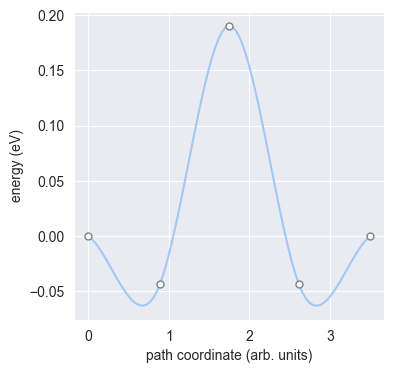

In [39]:
'''and now plot the result'''
try:
    import seaborn as sns
    sns.set_style('darkgrid')
    sns.set_palette('pastel')
except Exception:
    pass 
import matplotlib.pyplot as plt 
from ase.neb import NEBTools
fig,ax = plt.subplots(figsize=(4,4),dpi=100)
nebtools = NEBTools(neb)
Ef, dE = nebtools.get_barrier()
fit = nebtools.get_fit()
ax.plot(fit[2], fit[3])
ax.plot(fit[0], fit[1], **{'marker': 'o',
                           'linestyle': 'None',
                           'color': 'grey',
                           'markerfacecolor': 'white',
                           'markersize': 5})
ax.set_ylabel('energy (eV)')
ax.set_xlabel('path coordinate (arb. units)')
plt.show()

In [40]:
'''relax the end points first '''
_,ii = ineb.chgnet_relax(mappings_intcy[2592][0]['init_structure'],fmax=0.5)
_,ff = ineb.chgnet_relax(mappings_intcy[2592][0]['final_structure'],fmax=0.5)

       Step     Time          Energy          fmax
MDMin:    0 14:55:56     -615.276604        2.307220
MDMin:    1 14:55:56     -615.722706        1.839512
MDMin:    2 14:55:56     -616.709072        1.275107
MDMin:    3 14:55:57     -617.499397        0.607010
MDMin:    4 14:55:57     -617.797253        0.129592
       Step     Time          Energy          fmax
MDMin:    0 14:55:57     -615.276604        2.307221
MDMin:    1 14:55:58     -615.722706        1.839510
MDMin:    2 14:55:58     -616.709072        1.275114
MDMin:    3 14:55:58     -617.499397        0.607012
MDMin:    4 14:55:58     -617.797253        0.129597


In [41]:
'''now the NEB calcualtion'''
neb_intcy = ineb.chgnet_nebrun(ii,ff,nimages=3,fmax=0.5)

       Step     Time          Energy          fmax
MDMin:    0 14:56:00     -617.051739        1.043803
MDMin:    1 14:56:03     -617.177547        0.878157
MDMin:    2 14:56:06     -617.456402        0.679376
MDMin:    3 14:56:09     -617.655426        0.378993


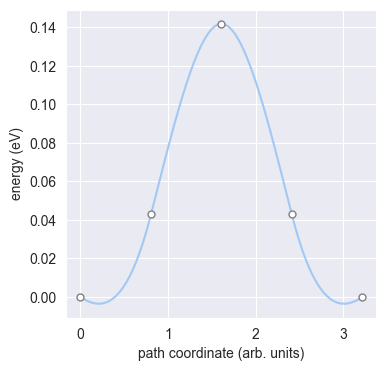

In [42]:
'''and now plot the result'''
try:
    import seaborn as sns
    sns.set_style('darkgrid')
    sns.set_palette('pastel')
except Exception:
    pass 
import matplotlib.pyplot as plt 
from ase.neb import NEBTools
fig,ax = plt.subplots(figsize=(4,4),dpi=100)
nebtools = NEBTools(neb_intcy)
Ef, dE = nebtools.get_barrier()
fit = nebtools.get_fit()
ax.plot(fit[2], fit[3])
ax.plot(fit[0], fit[1], **{'marker': 'o',
                           'linestyle': 'None',
                           'color': 'grey',
                           'markerfacecolor': 'white',
                           'markersize': 5})
ax.set_ylabel('energy (eV)')
ax.set_xlabel('path coordinate (arb. units)')
plt.show()

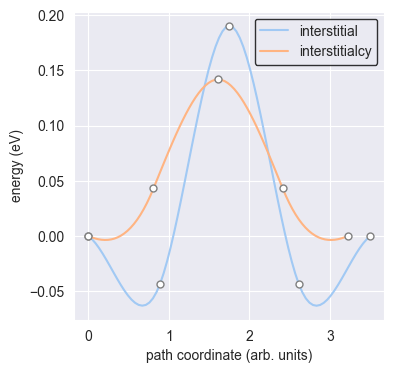

In [44]:
'''and now plot the result'''
try:
    import seaborn as sns
    sns.set_style('darkgrid')
    sns.set_palette('pastel')
except Exception:
    pass 
import matplotlib.pyplot as plt 
from ase.neb import NEBTools

labels = {0:'interstitial',1:'interstitialcy'}

fig,ax = plt.subplots(figsize=(4,4),dpi=100)
for i,calc in enumerate([neb,neb_intcy]):
    nebtools = NEBTools(calc)
    Ef, dE = nebtools.get_barrier()
    fit = nebtools.get_fit()
    ax.plot(fit[2], fit[3],label=labels[i])
    ax.plot(fit[0], fit[1], **{'marker': 'o',
                               'linestyle': 'None',
                               'color': 'grey',
                               'markerfacecolor': 'white',
                               'markersize': 5})
ax.set_ylabel('energy (eV)')
ax.set_xlabel('path coordinate (arb. units)')
ax.legend(edgecolor='black')
plt.show()